In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("AI-DataTrain.csv")
data2 = pd.read_csv("AI-DataTest.csv")

In [4]:
data.head()

,Num,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,1
1,1,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,1,1,0,...,1,1,0,0,1,0,1,0,1,1
3,3,1,1,0,0,1,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,4,1,0,0,1,1,0,0,1,0,...,1,0,1,1,1,0,1,0,1,1


In [5]:
data2.head()

,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,0,0,1,0,1,0,0,1,1,1,...,0,1,0,0,1,1,1,1,1,0
1,1,0,1,0,1,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,1,1,0,1,0,0
3,1,1,0,0,1,0,0,0,1,0,...,1,1,0,1,0,1,0,1,1,1
4,0,1,0,1,0,0,1,0,1,1,...,0,1,0,1,1,1,0,1,0,1


In [6]:
#data = data.drop('Num',axis=1)

In [7]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,0,1,0,0,0,0,0,1,0,1,...,0,0,1,1,1,0,0,0,1,1
1,1,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,1,1,0,1,...,1,1,0,0,1,0,1,0,1,1
3,1,1,0,0,1,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,1,0,0,1,1,0,0,1,0,1,...,1,0,1,1,1,0,1,0,1,1


In [8]:
data = data.values
data2 = data2.values

In [9]:
[m,n] = data.shape
print(m,n)
[l,p] = data2.shape
print(l,p)

1000 50
50 25


In [10]:
list1 = []
list2 = []
def prob(data,i,list,row):
    pb = 0
    count = 0
    total = 0
    for j in range(0,row,1):
        if data[j,i]==1:
            count = count + 1
        total = total + 1
    pb = count/total
    list.append(pb)
    
def inter(data,k,list,row):
    for i in range(0,k,1):
        prob(data,i,list,row)
        
inter(data,n,list1,m)
inter(data2,p,list2,l)


In [11]:
Y_train = []
Y_test = []
def weights(lt,Y,colm):
    for i in range(0,colm,1):
        if lt[i] > 0.700:
            Y.append(2)
        elif lt[i] > 0.350 and lt[i] < 0.699:
            Y.append(1)
        else:
            Y.append(0)
weights(list2,Y_test,p)
weights(list1,Y_train,n)

In [12]:
X_train = np.array(list1)
X_test = np.array(list2)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_train.shape

(50,)

In [13]:
from tensorflow import keras

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(12, activation=tf.nn.relu),
  tf.keras.layers.Dense(6, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train,Y_train,epochs=2000,validation_data=(X_test,Y_test))

Train on 50 samples, validate on 25 samples
Epoch 1/2000
50/50 [==============================] - 4s 77ms/sample - loss: 1.1072 - accuracy: 0.1800 - val_loss: 1.1031 - val_accuracy: 0.4000
Epoch 2/2000
50/50 [==============================] - 0s 1ms/sample - loss: 1.1023 - accuracy: 0.2800 - val_loss: 1.0972 - val_accuracy: 0.1200
Epoch 3/2000
50/50 [==============================] - 0s 1ms/sample - loss: 1.0966 - accuracy: 0.0200 - val_loss: 1.0918 - val_accuracy: 0.4000
Epoch 4/2000
50/50 [==============================] - 0s 1ms/sample - loss: 1.0927 - accuracy: 0.4400 - val_loss: 1.0873 - val_accuracy: 0.5600
Epoch 5/2000
50/50 [==============================] - 0s 2ms/sample - loss: 1.0895 - accuracy: 0.5600 - val_loss: 1.0851 - val_accuracy: 0.5600
Epoch 6/2000
50/50 [==============================] - 0s 1ms/sample - loss: 1.0886 - accuracy: 0.5600 - val_loss: 1.0838 - val_accuracy: 0.5600
Epoch 7/2000
50/50 [==============================] - 0s 1ms/sample - loss: 1.0875 - accura

Epoch 57/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9974 - accuracy: 0.5600 - val_loss: 0.9816 - val_accuracy: 0.5600
Epoch 58/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9955 - accuracy: 0.5600 - val_loss: 0.9799 - val_accuracy: 0.5600
Epoch 59/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9939 - accuracy: 0.5600 - val_loss: 0.9782 - val_accuracy: 0.5600
Epoch 60/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9923 - accuracy: 0.5600 - val_loss: 0.9765 - val_accuracy: 0.5600
Epoch 61/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9907 - accuracy: 0.5600 - val_loss: 0.9749 - val_accuracy: 0.5600
Epoch 62/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9889 - accuracy: 0.5600 - val_loss: 0.9733 - val_accuracy: 0.5600
Epoch 63/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9873 - accuracy: 0.5600 - val_loss: 0.9716 - val_ac

Epoch 113/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9054 - accuracy: 0.5800 - val_loss: 0.9022 - val_accuracy: 0.5600
Epoch 114/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.9033 - accuracy: 0.5800 - val_loss: 0.9009 - val_accuracy: 0.5600
Epoch 115/2000
50/50 [==============================] - 0s 961us/sample - loss: 0.9013 - accuracy: 0.5800 - val_loss: 0.8998 - val_accuracy: 0.5600
Epoch 116/2000
50/50 [==============================] - 0s 861us/sample - loss: 0.8994 - accuracy: 0.5800 - val_loss: 0.8986 - val_accuracy: 0.5600
Epoch 117/2000
50/50 [==============================] - 0s 840us/sample - loss: 0.8975 - accuracy: 0.6000 - val_loss: 0.8973 - val_accuracy: 0.5600
Epoch 118/2000
50/50 [==============================] - 0s 921us/sample - loss: 0.8954 - accuracy: 0.6000 - val_loss: 0.8960 - val_accuracy: 0.5600
Epoch 119/2000
50/50 [==============================] - 0s 881us/sample - loss: 0.8935 - accuracy: 0.6000 - val_loss

50/50 [==============================] - 0s 881us/sample - loss: 0.7843 - accuracy: 0.6800 - val_loss: 0.8175 - val_accuracy: 0.6800
Epoch 169/2000
50/50 [==============================] - 0s 941us/sample - loss: 0.7818 - accuracy: 0.6800 - val_loss: 0.8159 - val_accuracy: 0.6800
Epoch 170/2000
50/50 [==============================] - 0s 901us/sample - loss: 0.7793 - accuracy: 0.6800 - val_loss: 0.8143 - val_accuracy: 0.6800
Epoch 171/2000
50/50 [==============================] - 0s 961us/sample - loss: 0.7772 - accuracy: 0.6800 - val_loss: 0.8128 - val_accuracy: 0.6800
Epoch 172/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.7746 - accuracy: 0.6800 - val_loss: 0.8110 - val_accuracy: 0.6800
Epoch 173/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.7720 - accuracy: 0.6800 - val_loss: 0.8090 - val_accuracy: 0.6800
Epoch 174/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.7695 - accuracy: 0.6800 - val_loss: 0.8070 - val_ac

Epoch 224/2000
50/50 [==============================] - 0s 781us/sample - loss: 0.6447 - accuracy: 0.8000 - val_loss: 0.7163 - val_accuracy: 0.7600
Epoch 225/2000
50/50 [==============================] - 0s 580us/sample - loss: 0.6423 - accuracy: 0.8000 - val_loss: 0.7148 - val_accuracy: 0.7600
Epoch 226/2000
50/50 [==============================] - 0s 720us/sample - loss: 0.6399 - accuracy: 0.8000 - val_loss: 0.7134 - val_accuracy: 0.7600
Epoch 227/2000
50/50 [==============================] - 0s 721us/sample - loss: 0.6375 - accuracy: 0.8000 - val_loss: 0.7121 - val_accuracy: 0.7600
Epoch 228/2000
50/50 [==============================] - 0s 840us/sample - loss: 0.6348 - accuracy: 0.8000 - val_loss: 0.7108 - val_accuracy: 0.7600
Epoch 229/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.6326 - accuracy: 0.8000 - val_loss: 0.7095 - val_accuracy: 0.7600
Epoch 230/2000
50/50 [==============================] - 0s 981us/sample - loss: 0.6300 - accuracy: 0.8000 - val_lo

50/50 [==============================] - 0s 460us/sample - loss: 0.5182 - accuracy: 0.8600 - val_loss: 0.6280 - val_accuracy: 0.8400
Epoch 280/2000
50/50 [==============================] - 0s 540us/sample - loss: 0.5160 - accuracy: 0.8600 - val_loss: 0.6268 - val_accuracy: 0.8400
Epoch 281/2000
50/50 [==============================] - 0s 1ms/sample - loss: 0.5138 - accuracy: 0.8600 - val_loss: 0.6257 - val_accuracy: 0.8400
Epoch 282/2000
50/50 [==============================] - 0s 660us/sample - loss: 0.5118 - accuracy: 0.8600 - val_loss: 0.6245 - val_accuracy: 0.8400
Epoch 283/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.5097 - accuracy: 0.8600 - val_loss: 0.6237 - val_accuracy: 0.8400
Epoch 284/2000
50/50 [==============================] - 0s 540us/sample - loss: 0.5077 - accuracy: 0.8600 - val_loss: 0.6227 - val_accuracy: 0.8400
Epoch 285/2000
50/50 [==============================] - 0s 700us/sample - loss: 0.5056 - accuracy: 0.8600 - val_loss: 0.6215 - va

50/50 [==============================] - 0s 440us/sample - loss: 0.4186 - accuracy: 0.9000 - val_loss: 0.5662 - val_accuracy: 0.8800
Epoch 335/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.4170 - accuracy: 0.9000 - val_loss: 0.5651 - val_accuracy: 0.8800
Epoch 336/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.4155 - accuracy: 0.9000 - val_loss: 0.5640 - val_accuracy: 0.8800
Epoch 337/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.4142 - accuracy: 0.9000 - val_loss: 0.5628 - val_accuracy: 0.8800
Epoch 338/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.4124 - accuracy: 0.9000 - val_loss: 0.5615 - val_accuracy: 0.8800
Epoch 339/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.4110 - accuracy: 0.9000 - val_loss: 0.5603 - val_accuracy: 0.8400
Epoch 340/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.4094 - accuracy: 0.9000 - val_loss: 0.5588 - 

50/50 [==============================] - 0s 340us/sample - loss: 0.3454 - accuracy: 0.9200 - val_loss: 0.5247 - val_accuracy: 0.8400
Epoch 390/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.3441 - accuracy: 0.9200 - val_loss: 0.5243 - val_accuracy: 0.8400
Epoch 391/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.3432 - accuracy: 0.9200 - val_loss: 0.5240 - val_accuracy: 0.8400
Epoch 392/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.3419 - accuracy: 0.9200 - val_loss: 0.5233 - val_accuracy: 0.8400
Epoch 393/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.3408 - accuracy: 0.9200 - val_loss: 0.5228 - val_accuracy: 0.8400
Epoch 394/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.3396 - accuracy: 0.9200 - val_loss: 0.5222 - val_accuracy: 0.8400
Epoch 395/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.3385 - accuracy: 0.9200 - val_loss: 0.5215 - 

50/50 [==============================] - 0s 460us/sample - loss: 0.2912 - accuracy: 0.9400 - val_loss: 0.5029 - val_accuracy: 0.8800
Epoch 445/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.2906 - accuracy: 0.9400 - val_loss: 0.5029 - val_accuracy: 0.8800
Epoch 446/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.2897 - accuracy: 0.9600 - val_loss: 0.5031 - val_accuracy: 0.9200
Epoch 447/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.2891 - accuracy: 0.9600 - val_loss: 0.5032 - val_accuracy: 0.9200
Epoch 448/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.2883 - accuracy: 0.9600 - val_loss: 0.5028 - val_accuracy: 0.9200
Epoch 449/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.2874 - accuracy: 0.9600 - val_loss: 0.5022 - val_accuracy: 0.9200
Epoch 450/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.2865 - accuracy: 0.9600 - val_loss: 0.5017 - 

50/50 [==============================] - 0s 420us/sample - loss: 0.2513 - accuracy: 0.9600 - val_loss: 0.4879 - val_accuracy: 0.9200
Epoch 500/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.2507 - accuracy: 0.9600 - val_loss: 0.4880 - val_accuracy: 0.9200
Epoch 501/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.2501 - accuracy: 0.9600 - val_loss: 0.4880 - val_accuracy: 0.9200
Epoch 502/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.2495 - accuracy: 0.9600 - val_loss: 0.4879 - val_accuracy: 0.9200
Epoch 503/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.2489 - accuracy: 0.9600 - val_loss: 0.4879 - val_accuracy: 0.9200
Epoch 504/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.2482 - accuracy: 0.9600 - val_loss: 0.4878 - val_accuracy: 0.9200
Epoch 505/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.2478 - accuracy: 0.9600 - val_loss: 0.4877 - 

50/50 [==============================] - 0s 440us/sample - loss: 0.2215 - accuracy: 0.9600 - val_loss: 0.4772 - val_accuracy: 0.9200
Epoch 555/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.2209 - accuracy: 0.9600 - val_loss: 0.4771 - val_accuracy: 0.9200
Epoch 556/2000
50/50 [==============================] - 0s 360us/sample - loss: 0.2204 - accuracy: 0.9600 - val_loss: 0.4771 - val_accuracy: 0.9200
Epoch 557/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.2198 - accuracy: 0.9600 - val_loss: 0.4772 - val_accuracy: 0.9200
Epoch 558/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.2194 - accuracy: 0.9600 - val_loss: 0.4774 - val_accuracy: 0.9200
Epoch 559/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.2187 - accuracy: 0.9600 - val_loss: 0.4776 - val_accuracy: 0.9200
Epoch 560/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.2182 - accuracy: 0.9600 - val_loss: 0.4778 - 

50/50 [==============================] - 0s 500us/sample - loss: 0.1975 - accuracy: 0.9600 - val_loss: 0.4742 - val_accuracy: 0.9200
Epoch 610/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.1971 - accuracy: 0.9600 - val_loss: 0.4742 - val_accuracy: 0.9200
Epoch 611/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1968 - accuracy: 0.9600 - val_loss: 0.4740 - val_accuracy: 0.9200
Epoch 612/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1964 - accuracy: 0.9600 - val_loss: 0.4740 - val_accuracy: 0.9200
Epoch 613/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1964 - accuracy: 0.9600 - val_loss: 0.4742 - val_accuracy: 0.9200
Epoch 614/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1958 - accuracy: 0.9600 - val_loss: 0.4741 - val_accuracy: 0.9200
Epoch 615/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1954 - accuracy: 0.9600 - val_loss: 0.4740 - 

50/50 [==============================] - 0s 440us/sample - loss: 0.1794 - accuracy: 0.9800 - val_loss: 0.4757 - val_accuracy: 0.9200
Epoch 665/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1791 - accuracy: 0.9800 - val_loss: 0.4755 - val_accuracy: 0.9200
Epoch 666/2000
50/50 [==============================] - 0s 500us/sample - loss: 0.1788 - accuracy: 0.9800 - val_loss: 0.4752 - val_accuracy: 0.9200
Epoch 667/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1785 - accuracy: 0.9800 - val_loss: 0.4750 - val_accuracy: 0.9200
Epoch 668/2000
50/50 [==============================] - 0s 461us/sample - loss: 0.1781 - accuracy: 0.9800 - val_loss: 0.4748 - val_accuracy: 0.9200
Epoch 669/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1779 - accuracy: 0.9800 - val_loss: 0.4747 - val_accuracy: 0.9200
Epoch 670/2000
50/50 [==============================] - ETA: 0s - loss: 0.2103 - accuracy: 0.96 - 0s 461us/sample - loss: 0.177

Epoch 719/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1651 - accuracy: 0.9600 - val_loss: 0.4742 - val_accuracy: 0.9200
Epoch 720/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1651 - accuracy: 0.9600 - val_loss: 0.4744 - val_accuracy: 0.9200
Epoch 721/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1646 - accuracy: 0.9600 - val_loss: 0.4745 - val_accuracy: 0.9200
Epoch 722/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1643 - accuracy: 0.9600 - val_loss: 0.4747 - val_accuracy: 0.9200
Epoch 723/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1640 - accuracy: 0.9600 - val_loss: 0.4751 - val_accuracy: 0.9200
Epoch 724/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1638 - accuracy: 0.9600 - val_loss: 0.4755 - val_accuracy: 0.9200
Epoch 725/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1635 - accuracy: 0.9800 - val_

50/50 [==============================] - 0s 440us/sample - loss: 0.1535 - accuracy: 0.9800 - val_loss: 0.4778 - val_accuracy: 0.9200
Epoch 775/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1534 - accuracy: 0.9800 - val_loss: 0.4778 - val_accuracy: 0.9200
Epoch 776/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1532 - accuracy: 0.9800 - val_loss: 0.4780 - val_accuracy: 0.9200
Epoch 777/2000
50/50 [==============================] - 0s 500us/sample - loss: 0.1529 - accuracy: 0.9800 - val_loss: 0.4784 - val_accuracy: 0.9200
Epoch 778/2000
50/50 [==============================] - 0s 500us/sample - loss: 0.1526 - accuracy: 0.9800 - val_loss: 0.4789 - val_accuracy: 0.9200
Epoch 779/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1526 - accuracy: 0.9800 - val_loss: 0.4796 - val_accuracy: 0.9200
Epoch 780/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1522 - accuracy: 0.9800 - val_loss: 0.4800 - 

50/50 [==============================] - 0s 420us/sample - loss: 0.1439 - accuracy: 0.9800 - val_loss: 0.4836 - val_accuracy: 0.9200
Epoch 830/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1437 - accuracy: 0.9800 - val_loss: 0.4839 - val_accuracy: 0.9200
Epoch 831/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1439 - accuracy: 0.9800 - val_loss: 0.4842 - val_accuracy: 0.9200
Epoch 832/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1441 - accuracy: 0.9800 - val_loss: 0.4839 - val_accuracy: 0.9200
Epoch 833/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1438 - accuracy: 0.9800 - val_loss: 0.4842 - val_accuracy: 0.9200
Epoch 834/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1435 - accuracy: 0.9800 - val_loss: 0.4847 - val_accuracy: 0.9200
Epoch 835/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1433 - accuracy: 0.9800 - val_loss: 0.4851 - 

50/50 [==============================] - 0s 401us/sample - loss: 0.1360 - accuracy: 0.9800 - val_loss: 0.4901 - val_accuracy: 0.9200
Epoch 885/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1359 - accuracy: 0.9800 - val_loss: 0.4902 - val_accuracy: 0.9200
Epoch 886/2000
50/50 [==============================] - 0s 360us/sample - loss: 0.1364 - accuracy: 0.9800 - val_loss: 0.4904 - val_accuracy: 0.9200
Epoch 887/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1357 - accuracy: 0.9800 - val_loss: 0.4898 - val_accuracy: 0.9200
Epoch 888/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1353 - accuracy: 0.9800 - val_loss: 0.4892 - val_accuracy: 0.9200
Epoch 889/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1353 - accuracy: 0.9800 - val_loss: 0.4884 - val_accuracy: 0.9200
Epoch 890/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1351 - accuracy: 0.9800 - val_loss: 0.4879 - 

50/50 [==============================] - 0s 420us/sample - loss: 0.1293 - accuracy: 0.9800 - val_loss: 0.4936 - val_accuracy: 0.9200
Epoch 940/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1291 - accuracy: 0.9800 - val_loss: 0.4945 - val_accuracy: 0.9200
Epoch 941/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1301 - accuracy: 0.9800 - val_loss: 0.4952 - val_accuracy: 0.9200
Epoch 942/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.1290 - accuracy: 0.9800 - val_loss: 0.4950 - val_accuracy: 0.9200
Epoch 943/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1288 - accuracy: 0.9800 - val_loss: 0.4946 - val_accuracy: 0.9200
Epoch 944/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1287 - accuracy: 0.9800 - val_loss: 0.4940 - val_accuracy: 0.9200
Epoch 945/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.1285 - accuracy: 0.9800 - val_loss: 0.4936 - 

50/50 [==============================] - 0s 420us/sample - loss: 0.1238 - accuracy: 1.0000 - val_loss: 0.5025 - val_accuracy: 0.9600
Epoch 995/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1237 - accuracy: 1.0000 - val_loss: 0.5024 - val_accuracy: 0.9600
Epoch 996/2000
50/50 [==============================] - 0s 421us/sample - loss: 0.1235 - accuracy: 0.9800 - val_loss: 0.5019 - val_accuracy: 0.9600
Epoch 997/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1238 - accuracy: 0.9800 - val_loss: 0.5014 - val_accuracy: 0.9600
Epoch 998/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1232 - accuracy: 0.9800 - val_loss: 0.5014 - val_accuracy: 0.9600
Epoch 999/2000
50/50 [==============================] - 0s 500us/sample - loss: 0.1232 - accuracy: 0.9800 - val_loss: 0.5013 - val_accuracy: 0.9200
Epoch 1000/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1235 - accuracy: 0.9800 - val_loss: 0.5015 -

50/50 [==============================] - 0s 440us/sample - loss: 0.1182 - accuracy: 0.9800 - val_loss: 0.5067 - val_accuracy: 0.9600
Epoch 1050/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1181 - accuracy: 0.9800 - val_loss: 0.5083 - val_accuracy: 0.9600
Epoch 1051/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1185 - accuracy: 1.0000 - val_loss: 0.5099 - val_accuracy: 0.9600
Epoch 1052/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1188 - accuracy: 1.0000 - val_loss: 0.5111 - val_accuracy: 0.9600
Epoch 1053/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1190 - accuracy: 1.0000 - val_loss: 0.5118 - val_accuracy: 0.9600
Epoch 1054/2000
50/50 [==============================] - 0s 461us/sample - loss: 0.1191 - accuracy: 1.0000 - val_loss: 0.5120 - val_accuracy: 0.9600
Epoch 1055/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1191 - accuracy: 0.9800 - val_loss: 0.5

Epoch 1104/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1143 - accuracy: 0.9800 - val_loss: 0.5133 - val_accuracy: 0.9600
Epoch 1105/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.1141 - accuracy: 0.9800 - val_loss: 0.5136 - val_accuracy: 0.9600
Epoch 1106/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.1141 - accuracy: 0.9800 - val_loss: 0.5137 - val_accuracy: 0.9600
Epoch 1107/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1141 - accuracy: 0.9800 - val_loss: 0.5141 - val_accuracy: 0.9600
Epoch 1108/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.1139 - accuracy: 0.9800 - val_loss: 0.5142 - val_accuracy: 0.9600
Epoch 1109/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1141 - accuracy: 0.9800 - val_loss: 0.5142 - val_accuracy: 0.9600
Epoch 1110/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1138 - accuracy: 0.9800

Epoch 1159/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.1102 - accuracy: 0.9800 - val_loss: 0.5165 - val_accuracy: 0.9600
Epoch 1160/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1101 - accuracy: 0.9800 - val_loss: 0.5169 - val_accuracy: 0.9600
Epoch 1161/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.1100 - accuracy: 0.9800 - val_loss: 0.5174 - val_accuracy: 0.9600
Epoch 1162/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1099 - accuracy: 0.9800 - val_loss: 0.5182 - val_accuracy: 0.9600
Epoch 1163/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1102 - accuracy: 0.9800 - val_loss: 0.5188 - val_accuracy: 0.9600
Epoch 1164/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.1099 - accuracy: 0.9800 - val_loss: 0.5190 - val_accuracy: 0.9600
Epoch 1165/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1098 - accuracy: 0.9800

Epoch 1214/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.1068 - accuracy: 0.9800 - val_loss: 0.5248 - val_accuracy: 0.9600
Epoch 1215/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1069 - accuracy: 0.9800 - val_loss: 0.5249 - val_accuracy: 0.9600
Epoch 1216/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1068 - accuracy: 0.9800 - val_loss: 0.5246 - val_accuracy: 0.9600
Epoch 1217/2000
50/50 [==============================] - 0s 481us/sample - loss: 0.1065 - accuracy: 0.9800 - val_loss: 0.5239 - val_accuracy: 0.9600
Epoch 1218/2000
50/50 [==============================] - 0s 441us/sample - loss: 0.1064 - accuracy: 0.9800 - val_loss: 0.5229 - val_accuracy: 0.9600
Epoch 1219/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1070 - accuracy: 0.9800 - val_loss: 0.5223 - val_accuracy: 0.9600
Epoch 1220/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1067 - accuracy: 0.9800

Epoch 1269/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1037 - accuracy: 0.9800 - val_loss: 0.5279 - val_accuracy: 0.9600
Epoch 1270/2000
50/50 [==============================] - 0s 421us/sample - loss: 0.1035 - accuracy: 0.9800 - val_loss: 0.5278 - val_accuracy: 0.9600
Epoch 1271/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.1036 - accuracy: 0.9800 - val_loss: 0.5277 - val_accuracy: 0.9600
Epoch 1272/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.1036 - accuracy: 0.9800 - val_loss: 0.5277 - val_accuracy: 0.9600
Epoch 1273/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1036 - accuracy: 0.9800 - val_loss: 0.5276 - val_accuracy: 0.9600
Epoch 1274/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.1037 - accuracy: 0.9800 - val_loss: 0.5278 - val_accuracy: 0.9600
Epoch 1275/2000
50/50 [==============================] - 0s 441us/sample - loss: 0.1036 - accuracy: 0.9800

Epoch 1324/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1007 - accuracy: 0.9800 - val_loss: 0.5365 - val_accuracy: 0.9600
Epoch 1325/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1006 - accuracy: 0.9800 - val_loss: 0.5365 - val_accuracy: 0.9600
Epoch 1326/2000
50/50 [==============================] - 0s 540us/sample - loss: 0.1005 - accuracy: 0.9800 - val_loss: 0.5366 - val_accuracy: 0.9600
Epoch 1327/2000
50/50 [==============================] - 0s 540us/sample - loss: 0.1009 - accuracy: 0.9800 - val_loss: 0.5367 - val_accuracy: 0.9600
Epoch 1328/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.1004 - accuracy: 0.9800 - val_loss: 0.5375 - val_accuracy: 0.9600
Epoch 1329/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.1005 - accuracy: 0.9800 - val_loss: 0.5383 - val_accuracy: 0.9600
Epoch 1330/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.1008 - accuracy: 0.9800

Epoch 1379/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0981 - accuracy: 0.9800 - val_loss: 0.5428 - val_accuracy: 0.9600
Epoch 1380/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0983 - accuracy: 0.9800 - val_loss: 0.5422 - val_accuracy: 0.9600
Epoch 1381/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.0981 - accuracy: 0.9800 - val_loss: 0.5421 - val_accuracy: 0.9600
Epoch 1382/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0978 - accuracy: 0.9800 - val_loss: 0.5423 - val_accuracy: 0.9600
Epoch 1383/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0979 - accuracy: 0.9800 - val_loss: 0.5425 - val_accuracy: 0.9600
Epoch 1384/2000
50/50 [==============================] - 0s 360us/sample - loss: 0.0978 - accuracy: 0.9800 - val_loss: 0.5424 - val_accuracy: 0.9600
Epoch 1385/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0977 - accuracy: 0.9800

Epoch 1434/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0955 - accuracy: 0.9800 - val_loss: 0.5464 - val_accuracy: 0.9600
Epoch 1435/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0955 - accuracy: 0.9800 - val_loss: 0.5466 - val_accuracy: 0.9600
Epoch 1436/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0954 - accuracy: 0.9800 - val_loss: 0.5469 - val_accuracy: 0.9600
Epoch 1437/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0954 - accuracy: 0.9800 - val_loss: 0.5471 - val_accuracy: 0.9600
Epoch 1438/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0953 - accuracy: 0.9800 - val_loss: 0.5475 - val_accuracy: 0.9600
Epoch 1439/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0953 - accuracy: 0.9800 - val_loss: 0.5481 - val_accuracy: 0.9600
Epoch 1440/2000
50/50 [==============================] - 0s 401us/sample - loss: 0.0952 - accuracy: 0.9800

Epoch 1489/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0937 - accuracy: 1.0000 - val_loss: 0.5568 - val_accuracy: 0.9600
Epoch 1490/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0937 - accuracy: 1.0000 - val_loss: 0.5573 - val_accuracy: 0.9600
Epoch 1491/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0937 - accuracy: 1.0000 - val_loss: 0.5577 - val_accuracy: 0.9600
Epoch 1492/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0937 - accuracy: 1.0000 - val_loss: 0.5576 - val_accuracy: 0.9600
Epoch 1493/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0937 - accuracy: 1.0000 - val_loss: 0.5574 - val_accuracy: 0.9600
Epoch 1494/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.0935 - accuracy: 1.0000 - val_loss: 0.5566 - val_accuracy: 0.9600
Epoch 1495/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0930 - accuracy: 1.0000

Epoch 1544/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0912 - accuracy: 0.9800 - val_loss: 0.5565 - val_accuracy: 0.9600
Epoch 1545/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0914 - accuracy: 0.9800 - val_loss: 0.5564 - val_accuracy: 0.9600
Epoch 1546/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0912 - accuracy: 0.9800 - val_loss: 0.5561 - val_accuracy: 0.9600
Epoch 1547/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0915 - accuracy: 0.9800 - val_loss: 0.5559 - val_accuracy: 0.9600
Epoch 1548/2000
50/50 [==============================] - 0s 421us/sample - loss: 0.0917 - accuracy: 0.9800 - val_loss: 0.5562 - val_accuracy: 0.9600
Epoch 1549/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0914 - accuracy: 0.9800 - val_loss: 0.5563 - val_accuracy: 0.9600
Epoch 1550/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0916 - accuracy: 0.9800

Epoch 1599/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0893 - accuracy: 0.9800 - val_loss: 0.5631 - val_accuracy: 0.9600
Epoch 1600/2000
50/50 [==============================] - 0s 460us/sample - loss: 0.0892 - accuracy: 0.9800 - val_loss: 0.5632 - val_accuracy: 0.9600
Epoch 1601/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0892 - accuracy: 0.9800 - val_loss: 0.5631 - val_accuracy: 0.9600
Epoch 1602/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.0892 - accuracy: 0.9800 - val_loss: 0.5634 - val_accuracy: 0.9600
Epoch 1603/2000
50/50 [==============================] - 0s 580us/sample - loss: 0.0891 - accuracy: 0.9800 - val_loss: 0.5639 - val_accuracy: 0.9600
Epoch 1604/2000
50/50 [==============================] - 0s 661us/sample - loss: 0.0890 - accuracy: 0.9800 - val_loss: 0.5644 - val_accuracy: 0.9600
Epoch 1605/2000
50/50 [==============================] - 0s 600us/sample - loss: 0.0890 - accuracy: 0.9800

Epoch 1654/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0873 - accuracy: 0.9800 - val_loss: 0.5704 - val_accuracy: 0.9600
Epoch 1655/2000
50/50 [==============================] - 0s 941us/sample - loss: 0.0870 - accuracy: 0.9800 - val_loss: 0.5717 - val_accuracy: 0.9600
Epoch 1656/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0871 - accuracy: 0.9800 - val_loss: 0.5730 - val_accuracy: 0.9600
Epoch 1657/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0872 - accuracy: 1.0000 - val_loss: 0.5740 - val_accuracy: 0.9600
Epoch 1658/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0871 - accuracy: 1.0000 - val_loss: 0.5746 - val_accuracy: 0.9600
Epoch 1659/2000
50/50 [==============================] - 0s 500us/sample - loss: 0.0872 - accuracy: 1.0000 - val_loss: 0.5751 - val_accuracy: 0.9600
Epoch 1660/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0872 - accuracy: 1.0000

Epoch 1709/2000
50/50 [==============================] - 0s 500us/sample - loss: 0.0853 - accuracy: 0.9800 - val_loss: 0.5771 - val_accuracy: 0.9600
Epoch 1710/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0853 - accuracy: 0.9800 - val_loss: 0.5773 - val_accuracy: 0.9600
Epoch 1711/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0853 - accuracy: 0.9800 - val_loss: 0.5774 - val_accuracy: 0.9600
Epoch 1712/2000
50/50 [==============================] - 0s 360us/sample - loss: 0.0856 - accuracy: 0.9800 - val_loss: 0.5774 - val_accuracy: 0.9600
Epoch 1713/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0855 - accuracy: 0.9800 - val_loss: 0.5767 - val_accuracy: 0.9600
Epoch 1714/2000
50/50 [==============================] - 0s 441us/sample - loss: 0.0852 - accuracy: 0.9800 - val_loss: 0.5766 - val_accuracy: 0.9600
Epoch 1715/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0853 - accuracy: 0.9800

Epoch 1764/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0844 - accuracy: 0.9800 - val_loss: 0.5808 - val_accuracy: 0.9600
Epoch 1765/2000
50/50 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.96 - 0s 380us/sample - loss: 0.0847 - accuracy: 0.9800 - val_loss: 0.5808 - val_accuracy: 0.9600
Epoch 1766/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0846 - accuracy: 0.9800 - val_loss: 0.5813 - val_accuracy: 0.9600
Epoch 1767/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0841 - accuracy: 0.9800 - val_loss: 0.5818 - val_accuracy: 0.9600
Epoch 1768/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0843 - accuracy: 0.9800 - val_loss: 0.5826 - val_accuracy: 0.9600
Epoch 1769/2000
50/50 [==============================] - 0s 401us/sample - loss: 0.0836 - accuracy: 0.9800 - val_loss: 0.5830 - val_accuracy: 0.9600
Epoch 1770/2000
50/50 [==============================] - 0s 400u

50/50 [==============================] - 0s 360us/sample - loss: 0.0821 - accuracy: 1.0000 - val_loss: 0.5918 - val_accuracy: 0.9600
Epoch 1819/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0821 - accuracy: 1.0000 - val_loss: 0.5921 - val_accuracy: 0.9600
Epoch 1820/2000
50/50 [==============================] - 0s 360us/sample - loss: 0.0822 - accuracy: 1.0000 - val_loss: 0.5923 - val_accuracy: 0.9600
Epoch 1821/2000
50/50 [==============================] - 0s 440us/sample - loss: 0.0820 - accuracy: 1.0000 - val_loss: 0.5920 - val_accuracy: 0.9600
Epoch 1822/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0820 - accuracy: 1.0000 - val_loss: 0.5916 - val_accuracy: 0.9600
Epoch 1823/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0819 - accuracy: 0.9800 - val_loss: 0.5913 - val_accuracy: 0.9600
Epoch 1824/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0818 - accuracy: 0.9800 - val_loss: 0.5

Epoch 1873/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0808 - accuracy: 0.9800 - val_loss: 0.5937 - val_accuracy: 0.9600
Epoch 1874/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0808 - accuracy: 0.9800 - val_loss: 0.5939 - val_accuracy: 0.9600
Epoch 1875/2000
50/50 [==============================] - 0s 360us/sample - loss: 0.0806 - accuracy: 0.9800 - val_loss: 0.5941 - val_accuracy: 0.9600
Epoch 1876/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0807 - accuracy: 0.9800 - val_loss: 0.5944 - val_accuracy: 0.9600
Epoch 1877/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0807 - accuracy: 0.9800 - val_loss: 0.5948 - val_accuracy: 0.9600
Epoch 1878/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0806 - accuracy: 0.9800 - val_loss: 0.5950 - val_accuracy: 0.9600
Epoch 1879/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0807 - accuracy: 0.9800

Epoch 1928/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0793 - accuracy: 0.9800 - val_loss: 0.6005 - val_accuracy: 0.9600
Epoch 1929/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0792 - accuracy: 0.9800 - val_loss: 0.6006 - val_accuracy: 0.9600
Epoch 1930/2000
50/50 [==============================] - 0s 360us/sample - loss: 0.0791 - accuracy: 0.9800 - val_loss: 0.6007 - val_accuracy: 0.9600
Epoch 1931/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.0793 - accuracy: 0.9800 - val_loss: 0.6006 - val_accuracy: 0.9600
Epoch 1932/2000
50/50 [==============================] - 0s 441us/sample - loss: 0.0792 - accuracy: 0.9800 - val_loss: 0.6009 - val_accuracy: 0.9600
Epoch 1933/2000
50/50 [==============================] - 0s 480us/sample - loss: 0.0791 - accuracy: 0.9800 - val_loss: 0.6013 - val_accuracy: 0.9600
Epoch 1934/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0791 - accuracy: 0.9800

Epoch 1983/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0775 - accuracy: 0.9800 - val_loss: 0.6084 - val_accuracy: 0.9600
Epoch 1984/2000
50/50 [==============================] - 0s 400us/sample - loss: 0.0775 - accuracy: 0.9800 - val_loss: 0.6088 - val_accuracy: 0.9600
Epoch 1985/2000
50/50 [==============================] - 0s 381us/sample - loss: 0.0775 - accuracy: 0.9800 - val_loss: 0.6095 - val_accuracy: 0.9600
Epoch 1986/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0777 - accuracy: 0.9800 - val_loss: 0.6101 - val_accuracy: 0.9600
Epoch 1987/2000
50/50 [==============================] - 0s 420us/sample - loss: 0.0776 - accuracy: 0.9800 - val_loss: 0.6103 - val_accuracy: 0.9600
Epoch 1988/2000
50/50 [==============================] - 0s 380us/sample - loss: 0.0775 - accuracy: 0.9800 - val_loss: 0.6103 - val_accuracy: 0.9600
Epoch 1989/2000
50/50 [==============================] - 0s 381us/sample - loss: 0.0775 - accuracy: 0.9800

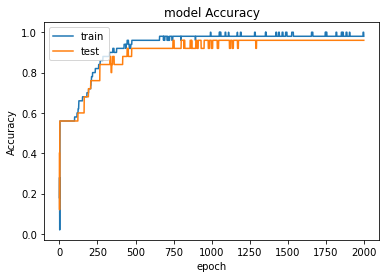

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [17]:
classifications = model.predict(X_test)

In [18]:
testweights = []
testprob = []
for i in range(0,p,1):
    if classifications[i,0] > classifications[i,1] and classifications[i,0] > classifications[i,2]:
        testweights.append('0')
        testprob.append(classifications[i,0])
    elif classifications[i,1] > classifications[i,2]:
        testweights.append('1')
        testprob.append(classifications[i,1])
    else:
        testweights.append('2')
        testprob.append(classifications[i,2])

In [19]:
Question = []
for i in range(0,p,1):
    k = i+1 
    qs = "Question"+str(k)
    Question.append(qs)

In [20]:
#pip install openpyxl

In [22]:
df = pd.DataFrame() 
  
# Creating two columns 
df['Question'] = Question
df['Weights'] = testweights
df['Prob'] = testprob

# Converting to excel 
df.to_excel('result67.xlsx', index = False)